## Importing Necessary Libraries

In [4]:
# Basic Libraries

import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

# Libraries for Classification and building Models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Project Specific Libraries

import os
import librosa
import librosa.display
import glob 
import skimage

## Loading Data and EDA

In [8]:
path = '/Users/tjmask/Desktop/Semester 2/Data Mining/HW2/kaggle project/'
df_audio = pd.read_csv(path + 'UrbanSound8K.csv')
df_audio.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [23]:
dt1, sampling_rate1 = librosa.load(path + '101415-3-0-2.wav')
dt1

array([-0.00011783, -0.00017157, -0.00017749, ..., -0.04598654,
       -0.04624664, -0.05089863], dtype=float32)

In [25]:
dt1.shape

(88200,)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

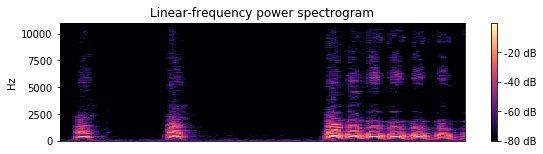

In [26]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dt1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [29]:
dt2, sampling_rate2 = librosa.load(path + '102305-6-0-0.wav')
dt2.shape

(57551,)

In [30]:
for i in range(192, 197, 2):
    print(i)

192
194
196


In [31]:
arr = librosa.feature.melspectrogram(y=dt1, sr=sampling_rate1)
arr.shape

(128, 173)

In [32]:
arr

array([[1.7319502e-04, 5.8854628e-05, 3.0627798e-05, ..., 9.0446963e-05,
        2.9211896e-03, 2.5984084e-02],
       [3.9896331e-05, 9.6882090e-05, 3.7020986e-04, ..., 2.7305873e-03,
        2.7992586e-03, 2.1996262e-02],
       [3.8936446e-04, 1.7081496e-03, 4.5822584e-03, ..., 3.1180698e-03,
        7.9575479e-03, 6.1906859e-02],
       ...,
       [3.1561164e-08, 5.7237646e-08, 8.5380563e-08, ..., 5.4648842e-07,
        1.1835175e-05, 7.8952238e-05],
       [1.8453166e-08, 2.5609161e-08, 2.2734941e-08, ..., 1.5779567e-07,
        2.3741113e-06, 1.3183632e-05],
       [5.1850719e-09, 2.7883020e-09, 1.9900832e-09, ..., 3.0625498e-09,
        7.4768323e-08, 5.7682740e-07]], dtype=float32)

In [39]:
X = np.empty([8, 3])
X_ = np.array([1,2,3,4,5,6,7,8]).reshape(8,1)
X_

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

In [40]:
for i in range(8):
    X[i] = X_[i]

In [41]:
X

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.],
       [5., 5., 5.],
       [6., 6., 6.],
       [7., 7., 7.],
       [8., 8., 8.]])

In [44]:
mels = np.mean(librosa.feature.melspectrogram(y=dt1, sr=sampling_rate1).T,axis=0)
mels.shape

(128,)